1. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$


In [126]:
import numpy as np
from sympy import Symbol
from scipy.integrate import quad

Primero resuelvo la integral tomando $m=0$

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}



In [127]:
m = 0 # Tomo como valor aproximado m = 0 para realizar los calculos 
x = Symbol('x')
f = lambda x: 1/(np.sqrt(1 - m*(np.sin(x)**2)))
result = quad(f, 0, 1.5)
result

(1.5, 1.6653345369377348e-14)

Luego tomando igualmente $m=0$ se hace:

\begin{equation}
\approx a_0+a_1m_1+a_2m_2 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}

In [128]:
# Valores dados por el ejercicio

m1 = 1-m
err = 3*1e-5
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.0725296
b2 = 0.0288729


T1 = a0+a1*m1+a2*m1
T2 = (b0+b1*m1+b2*m1**2)  
T3 = np.log(m1)+err 
  
T = T1 - T2 * T3
T

1.5707767933789998

In [129]:
print('la diferencia de ambos resultados es de:', T - result[0])

la diferencia de ambos resultados es de: 0.07077679337899978


 Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

$
a) Aφ(r = 1.1, θ) vs. θ. \\
b) Aφ(r, θ = π∕3) vs. r
$

#Resolver el punto b

Solución

1. Identificar parametros iniciales 
2. Calcular k^2, Grafica. 
3. Evaluar las integrales
4. Evaluar la funcion

```
def A (r, theta, phi, a, I ):
  T1=Calculo 
  
  I1 = trap(K)
  T2 = Calulo 
  I2 = trap(E)
  T3 = Calulo

  return T1*T2*T3


theta = np.linspace()
Potencial=np.zeros(len(theta))

for i, t in enumerate(theta):
  Potencial[i] = A (r, theta, phi, a, I )


```




In [ ]:
import numpy as np
import matplotlib.pylab as plt
from scipy import integrate


# Funcion para k^2

\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}

para $theta=\pi/2$


---



$k^2 = \frac{4*1.1}{1+1.1^2+2*1.1}$



In [ ]:
def k_square(r, theta, a):  
  num = 4*a*r*np.sin(theta)
  den = a**2+r**2+2*a*r*np.sin(theta) 
  return num/den

theta = np.linspace(0, np.pi/2, 100)

Text(0, 0.5, '$k^2(r, \\theta)$')

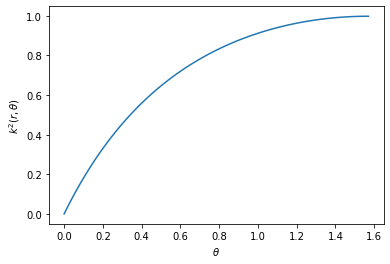

In [ ]:
plt.plot(theta, k_square(1.1,theta, 1 ))
plt.xlabel("$\\theta$")
plt.ylabel("$k^2(r, \\theta)$")

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}



In [ ]:
K_ = lambda k, phi: 1./np.sqrt( 1 - (k * np.sin(phi)) **2 )

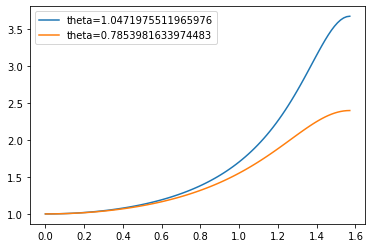

In [ ]:
# Validacion de las funciones a integrar

phi = np.linspace(0,np.pi/2, 100  )

theta = np.pi/3
k2 = k_square(1.1,theta , 1)
plt.plot(phi, K_( np.sqrt(k2) , phi ), label=f"theta={theta}")

theta = np.pi/4
k2 = k_square(1.1,theta , 1)
plt.plot(phi, K_( np.sqrt(k2) , phi ), label=f"theta={theta}")
plt.legend()

In [ ]:
#Solucion de la Integral empleando el metodo de trapecio
# para un valor theta, r, a 

phi = np.linspace(0, np.pi/2, 100 )
theta = np.pi/3
r = 1.1
a = 1
k2 = k_square(r, theta , a)
y = K_( np.sqrt(k2) , phi )
integrate.trapz(y, phi )

2.720266476771735


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


In [ ]:
E_ = lambda k, phi: np.sqrt( 1 - (k * np.sin(phi)) **2 )

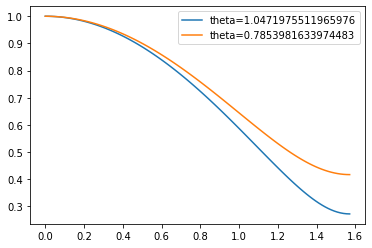

In [ ]:
# Validacion de las funciones a integrar
phi = np.linspace(0,np.pi/2, 100  )
theta = np.pi/3


plt.figure()
k2 = k_square(1.1,theta , 1)
plt.plot(phi, E_( np.sqrt(k2) , phi ), label=f"theta={theta}")

theta = np.pi/4
k2 = k_square(1.1,theta , 1)
plt.plot(phi, E_( np.sqrt(k2) , phi ), label=f"theta={theta}")
plt.legend()

In [ ]:
#Solucion de la Integral empleando el metodo de trapecio
# para un valor theta, r, a 

phi = np.linspace(0, np.pi/2, 100 )
theta = np.pi/3
r = 1.1
a = 1
k2 = k_square(r, theta , a)
y = E_( np.sqrt(k2) , phi )
integrate.trapz(y, phi )

1.0827297068809603


\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


In [ ]:
# Calculo del potencial
E_ = lambda k, phi: np.sqrt( 1 - (k * np.sin(phi)) **2 )
K_ = lambda k, phi: 1./np.sqrt( 1 - (k * np.sin(phi)) **2 )

def k_square(r, theta, a):  
  num = 4*a*r*np.sin(theta)
  den = a**2+r**2+2*a*r*np.sin(theta) 
  return num/den



def Apotencial(r, theta, phi, a, I, cte = 1 ):
  
  T11 = cte*4*I*a
  T12 = np.sqrt( a**2 + r**2 + 2*a*r*np.sin(theta))
  T1 = T11/T12

  k2 = k_square(r, theta, a)
  T21 = (2 - k2)
  T22 = integrate.trapz(  K_(np.sqrt(k2), phi), phi)
  T2 = T21*T22

  T3 =  integrate.trapz(  E_(np.sqrt(k2), phi), phi)
  A = T1*(T2 - 2*T3)/k2

  return A

  


In [ ]:
# Paramtros 
theta = np.pi/3
r = 1.1
a = 1.0
I = 3.0
phi = np.linspace(0, np.pi/2, 100)

A = Apotencial(r, theta, phi, a, I, cte = 1 )
print(A)

4.831268608470725


In [ ]:
r = 1.1 # Punto donde calcular el potencial 
a = 1.0 # RAdio de la espira, unidades computacionales
I = 3.0 #Corriente que circula por la espira, unidades computacionales
N = 100 # Numero o resolución en theta y phi


theta = np.linspace(0.01, np.pi/2, N)
phi = np.linspace(0, np.pi/2, N)

Ap = np.zeros(len(theta))

for i, t in enumerate(theta):
    Ap[i] = Apotencial(r, t, phi, a, I, cte = 1 )



Text(0, 0.5, '$A(r=1.1, \\theta)$')

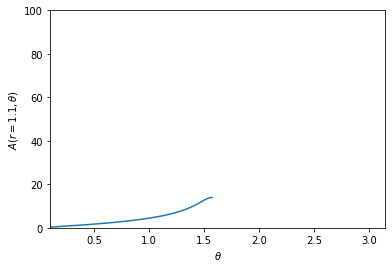

In [ ]:
plt.plot(theta, Ap)
plt.xlim(0.1, np.pi)
plt.ylim(0,100)
plt.xlabel("$\\theta$")
plt.ylabel("$A(r=1.1, \\theta)$")

##***Punto b***

Text(0, 0.5, '$A(r, \\theta =\\pi/3)$')

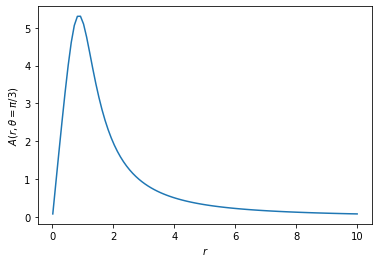

In [ ]:
#Haciendo uso de las funciones anteriores las cuales fueron halladas en clase
# Pero en este caso tomando un valor fijo para theta y variando el valor de r se tiene 

theta = np.pi/3 
a = 1.0 
I = 3.0 
N = 100 


r = np.linspace(0.01, 10, N)
phi = np.linspace(0, np.pi/2, N)
Ap_r = np.zeros(len(r))

# Grafica de potencial en funcion de r
for i, r_ in enumerate(r):
  Ap_r[i] = Apotencial(r_,theta,phi,a,I,cte=1)

plt.plot(r, Ap_r)
plt.xlabel("$r$")
plt.ylabel("$A(r, \\theta =\\pi/3)$",)